In [1]:
if(~exist('libhampath/hfun.m','file'))
    [s,m] = system('hampath -octave');
end;

In [2]:
addpath('libhampath/');

In [3]:
t0      = 0.0;                                      % Initial time
tf      = 1.0;                                      % Final time
q0      = [-1.0 0.0]';                              % Initial state
yGuess  = [0.1 0.1]';                               % Initial guess for the shooting metdhod
par     = [t0 tf q0(1) q0(2) 0.0 0.0 0.0]';         % t0, tf, x_0, v_0, x_f, v_f, lambda_0
par0    = par;                                      % par_0
parf    = par; ilambda = 7; parf(ilambda) = 1.0;    % par_f with lambda_f = 1.0 : for homotopy on lambda
options = hampathset;                               % Hampath options
n       = 2;                                        % State dimension

In [4]:
[y0,ssol,nfev,njev,flag] = ssolve(yGuess,options,par0);


     Calls  |S(y)|                 |y|

         0  0.967958906382107E+00  0.141421356237310E+00
         1  0.361462428790642E-14  0.134164078649987E+02
         2  0.315779905631428E-14  0.134164078649987E+02
         3  0.590091631821035E-14  0.134164078649987E+02
         4  0.899828741205516E-14  0.134164078649987E+02
         5  0.361462428790642E-14  0.134164078649987E+02
         6  0.611832617168011E-14  0.134164078649987E+02
         7  0.741110251757543E-14  0.134164078649987E+02
         8  0.535790456979763E-14  0.134164078649987E+02
         9  0.711929161928699E-14  0.134164078649987E+02
        10  0.537054250957417E-14  0.134164078649987E+02
        11  0.803129534716921E-14  0.134164078649987E+02
        12  0.356829203518054E-14  0.134164078649987E+02
        13  0.361462428790642E-14  0.134164078649987E+02
        14  0.232977596905503E-13  0.134164078649987E+02
        15  0.361462428790642E-14  0.134164078649987E+02
        16  0.225230296777251E-13  0.1341640786


  Homotopic param.   Arclength s     det(s)          |S(y,lambda)|   Inner product   |y|
 
  0.00000000000E+00  0.00000000E+00 -0.83341135E-01  0.71374476E-14  0.00000000E+00  0.13416407865E+02
  0.17279852851E-02  0.17280300E-02 -0.83342019E-01  0.58324354E-14  0.99998862E+00  0.13416419544E+02
  0.28045801880E-02  0.28048186E-02 -0.83356208E-01  0.51178753E-15  0.99996018E+00  0.13416438623E+02
  0.87007389168E-02  0.87082677E-02 -0.83553216E-01  0.22142932E-13  0.99881086E+00  0.13416703862E+02
  0.16189762747E-01  0.16238252E-01 -0.84092301E-01  0.18545971E-14  0.99811393E+00  0.13417432686E+02
  0.26245151669E-01  0.26450868E-01 -0.85314115E-01  0.12044174E-14  0.99673493E+00  0.13419101002E+02
  0.37894946869E-01  0.38509606E-01 -0.87414611E-01  0.54271018E-14  0.99593901E+00  0.13422022387E+02
  0.51615573284E-01  0.53150471E-01 -0.90766893E-01  0.79476004E-15  0.99501373E+00  0.13426823738E+02
  0.68631224634E-01  0.72172549E-01 -0.96106586E-01  0.11893090E-14  0.99363563E+00 

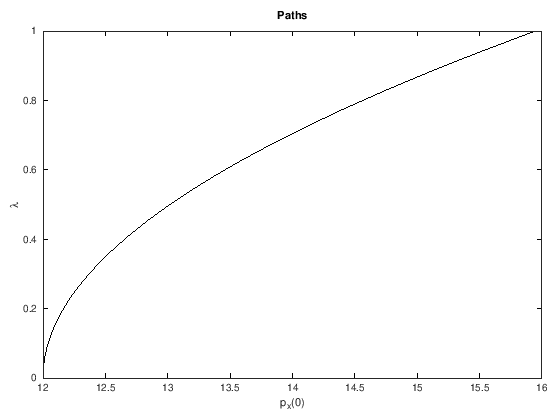

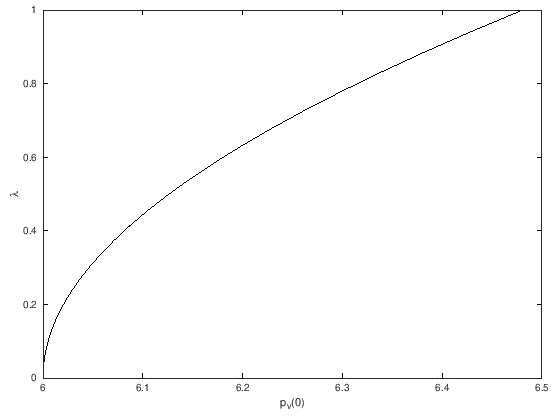

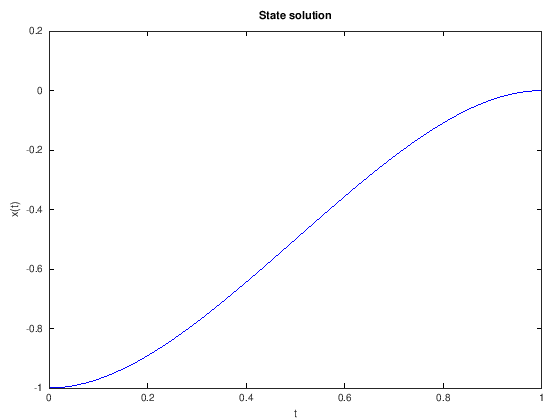

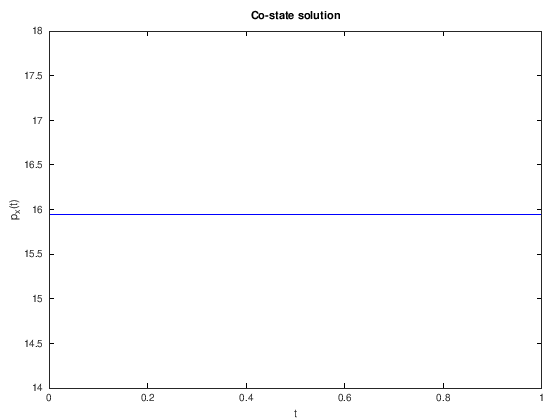

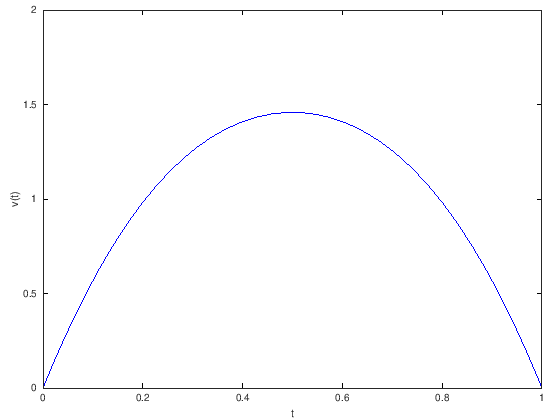

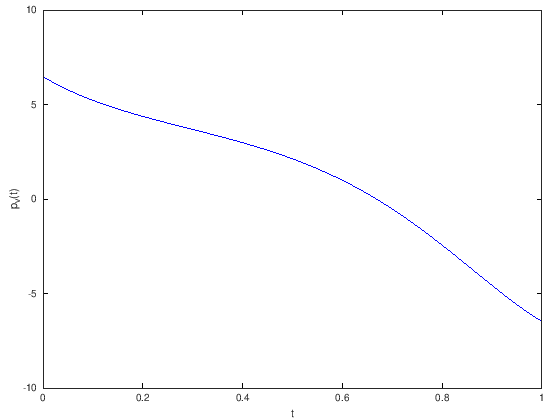

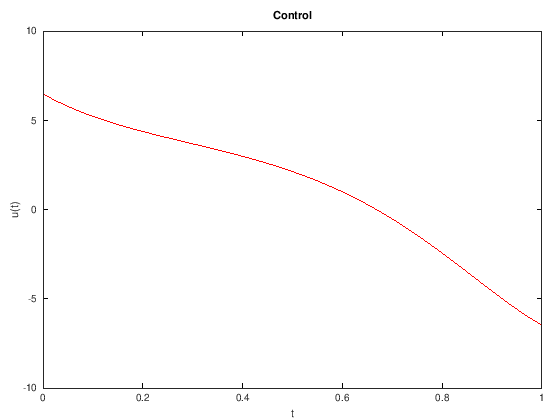

In [5]:
parspan = [par0 parf];
[parout,yout,~,~,~,~,~,flag] = hampath(parspan,y0,options);

lout    = parout(ilambda,:);
p0f     = yout(:,end);
parf    = parout(:,end);

% Figures
% Paths
figure;
%subplot(2,5,1);
plot(yout(1,:),lout,'k');xlabel('p_x(0)');ylabel('\lambda'); drawnow; title('Paths');
%subplot(2,5,6);
figure;plot(yout(2,:),lout,'k');xlabel('p_v(0)');ylabel('\lambda'); drawnow;

% Solution
[tout,z,flag] = exphvfun([t0 tf],[q0;p0f],options,parf);

%subplot(2,5,2);
figure;plot(tout,z(1,:),'b');xlabel('t');ylabel('x(t)');   drawnow; xlim([t0 tf]); title('State solution');
%subplot(2,5,3);
figure;plot(tout,z(3,:),'b');xlabel('t');ylabel('p_x(t)'); drawnow; xlim([t0 tf]); title('Co-state solution');
%subplot(2,5,7);
figure;plot(tout,z(2,:),'b');xlabel('t');ylabel('v(t)');   drawnow; xlim([t0 tf]);
%subplot(2,5,8);
figure;plot(tout,z(4,:),'b');xlabel('t');ylabel('p_v(t)'); drawnow; xlim([t0 tf]);

% Control
u       = control(tout,z,parf);
%subplot(2,5,[4 5]);
figure;plot(tout,u,'r');xlabel('t');ylabel('u(t)');    drawnow; xlim([t0 tf]); title('Control');

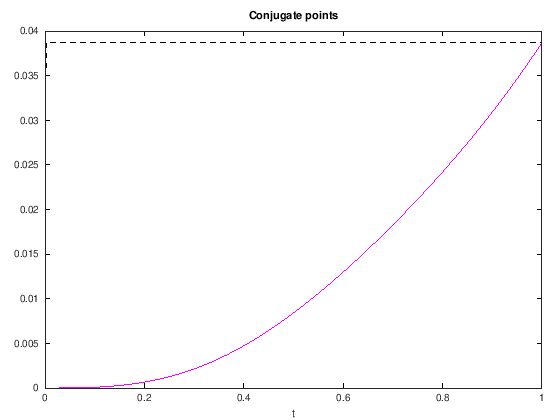

In [6]:
% Compute Jacobi fields
k = n; % regular case, k = n : fixed tf
z0  = [q0;p0f]; dz0 = [zeros(n);eye(n)];
[tout,z,dz,flag] = expdhvfun([t0 tf],z0,dz0,options,parf);

sv=[]; de=[];
for j = 1:length(tout)
    dq    = dz(1:n,1+(j-1)*k:j*k);
    sv(j) = min(svd(dq));           % Get smallest singular value
    de(j) = det(dq);                % Get determinant
end;

%subplot(2,5,[9 10]); 
figure;plot(tout,sv,'m'); hold on; plot(tout,max(sv)*sign(de),'k--'); hold on; xlabel('t');
%leg = legend('$\sigma_{min}$','$sign(\det(\delta q))$','location','West');
%set(leg,'Interpreter','latex');
drawnow; title('Conjugate points');